In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import requests
import seaborn as sns

import covid19

## data

In [3]:
data_path = covid19.data.download('states', repo='usa')


In [4]:
df_regions = pd.read_csv(data_path, parse_dates=['date'], index_col=['date'])

df_regions.index = df_regions.index.normalize()

REGIONS = df_regions.loc[df_regions.index.max()].sort_values('cases', ascending=False)['state'].tolist()

print(REGIONS)

data_regions = {region: df_regions[df_regions['state'] == region] for region in REGIONS}
for dr in data_regions.values():
    dr['deaths_now'] = dr['deaths'].diff(1)

df_regions.loc[df_regions.index.max()].sort_values('cases', ascending=False)[['state', 'cases', 'deaths']]


['New York', 'New Jersey', 'California', 'Michigan', 'Florida', 'Massachusetts', 'Illinois', 'Louisiana', 'Pennsylvania', 'Washington', 'Georgia', 'Texas', 'Connecticut', 'Colorado', 'Indiana', 'Ohio', 'Tennessee', 'Maryland', 'North Carolina', 'Missouri', 'Wisconsin', 'Virginia', 'Arizona', 'South Carolina', 'Nevada', 'Alabama', 'Mississippi', 'Utah', 'Oregon', 'Oklahoma', 'Minnesota', 'Kentucky', 'Idaho', 'Arkansas', 'District of Columbia', 'Rhode Island', 'Iowa', 'Kansas', 'New Hampshire', 'Delaware', 'New Mexico', 'Maine', 'Vermont', 'Puerto Rico', 'Hawaii', 'Nebraska', 'Montana', 'West Virginia', 'North Dakota', 'Guam', 'Alaska', 'Wyoming', 'South Dakota', 'Virgin Islands', 'Northern Mariana Islands']


,state,cases,deaths
date,,,
2020-04-01,New York,83889,1941
2020-04-01,New Jersey,22255,355
2020-04-01,California,9816,212
2020-04-01,Michigan,9293,336
2020-04-01,Florida,7765,100
2020-04-01,Massachusetts,7738,122
2020-04-01,Illinois,6980,146
2020-04-01,Louisiana,6424,273
2020-04-01,Pennsylvania,5805,74


In [5]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

SHOWUNTIL = np.datetime64(df_regions.index.max(), 's') + 2 * DAY
print (SHOWUNTIL)

EXTENT = ('2020-02-23', SHOWUNTIL)

XLIM = tuple(map(np.datetime64, EXTENT))

2020-04-03T00:00:00


In [6]:
REGIONS_FIT_PARAMS = {
    'New York': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Washington': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'California': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'New Jersey': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'North Carolina': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Florida': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Mississippi': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Michigan':  {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Massachusetts': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Illinois': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Louisiana': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Pennsylvania': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Georgia': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Texas': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25', '2020-03-29'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Colorado': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Connecticut': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Ohio': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Tennessee': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Indiana': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Maryland': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Wisconsin': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Alabama': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Alaska': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Arizona': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Arkansas': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Delaware': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'District of Columbia': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Guam': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Hawaii':  {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Idaho': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Iowa': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Kansas': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Kentucky': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Maine': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Minnesota': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Missouri': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Montana': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Nebraska': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Nevada': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'New Hampshire': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'New Mexico': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'North Dakota': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Oklahoma': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Oregon': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Puerto Rico': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Rhode Island': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'South Carolina': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'South Dakota': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Utah': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Vermont': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Virgin Islands': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Virginia': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'West Virginia': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
    'Wyoming': {
        'cases': [ '2020-03-01', '2020-03-07', '2020-03-25'],
        'hospitalized': 0,
        'deaths': 0,
    },
}

In [7]:
region_fits = {}
for region, params in REGIONS_FIT_PARAMS.items():
    region_fits[region] = {}
    for kind, limits in params.items():
        region_fits[region][kind] = []
        if isinstance(limits, int):
            limits = [np.datetime64(d) + limits * DAY for d in params['cases']]
        starts = [None] + list(map(np.datetime64, limits))
        stops = [d - DAY for d in starts[1:]] + [None]
        for start, stop in zip(starts, stops):
            try:
                region_fits[region][kind] += [covid19.fit.ExponentialFit.from_frame(kind, data_regions[region], start=start, stop=stop)]
            except:
                print('skipping:', region, start, stop)

skipping: New York None 2020-02-29T00:00:00
skipping: New York None 2020-02-29T00:00:00
skipping: New York 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: New York 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: New York 2020-03-25T00:00:00 2020-03-28T00:00:00
skipping: New York 2020-03-29T00:00:00 None
skipping: New York None 2020-02-29T00:00:00
skipping: New York 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Washington None 2020-02-29T00:00:00
skipping: Washington 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Washington 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Washington 2020-03-25T00:00:00 2020-03-28T00:00:00
skipping: Washington 2020-03-29T00:00:00 None
skipping: Washington None 2020-02-29T00:00:00
skipping: California None 2020-02-29T00:00:00
skipping: California 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: California 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: California 2020-03-25T00:00:00 2020-03-28T00:00:00
skipping: California 2020-03-29T00:00:

skipping: Guam 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Guam 2020-03-25T00:00:00 None
skipping: Hawaii None 2020-02-29T00:00:00
skipping: Hawaii 2020-03-01 2020-03-06T00:00:00
skipping: Hawaii None 2020-02-29T00:00:00
skipping: Hawaii 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Hawaii 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Hawaii 2020-03-25T00:00:00 None
skipping: Hawaii None 2020-02-29T00:00:00
skipping: Hawaii 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Hawaii 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Hawaii 2020-03-25T00:00:00 None
skipping: Idaho None 2020-02-29T00:00:00
skipping: Idaho 2020-03-01 2020-03-06T00:00:00
skipping: Idaho None 2020-02-29T00:00:00
skipping: Idaho 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Idaho 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Idaho 2020-03-25T00:00:00 None
skipping: Idaho None 2020-02-29T00:00:00
skipping: Idaho 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Idaho 2020-03-07T00:00:00 2020

skipping: West Virginia None 2020-02-29T00:00:00
skipping: West Virginia 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: West Virginia 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: West Virginia 2020-03-25T00:00:00 None
skipping: West Virginia None 2020-02-29T00:00:00
skipping: West Virginia 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: West Virginia 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: West Virginia 2020-03-25T00:00:00 None
skipping: Wyoming None 2020-02-29T00:00:00
skipping: Wyoming 2020-03-01 2020-03-06T00:00:00
skipping: Wyoming None 2020-02-29T00:00:00
skipping: Wyoming 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Wyoming 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Wyoming 2020-03-25T00:00:00 None
skipping: Wyoming None 2020-02-29T00:00:00
skipping: Wyoming 2020-03-01T00:00:00 2020-03-06T00:00:00
skipping: Wyoming 2020-03-07T00:00:00 2020-03-24T00:00:00
skipping: Wyoming 2020-03-25T00:00:00 None


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

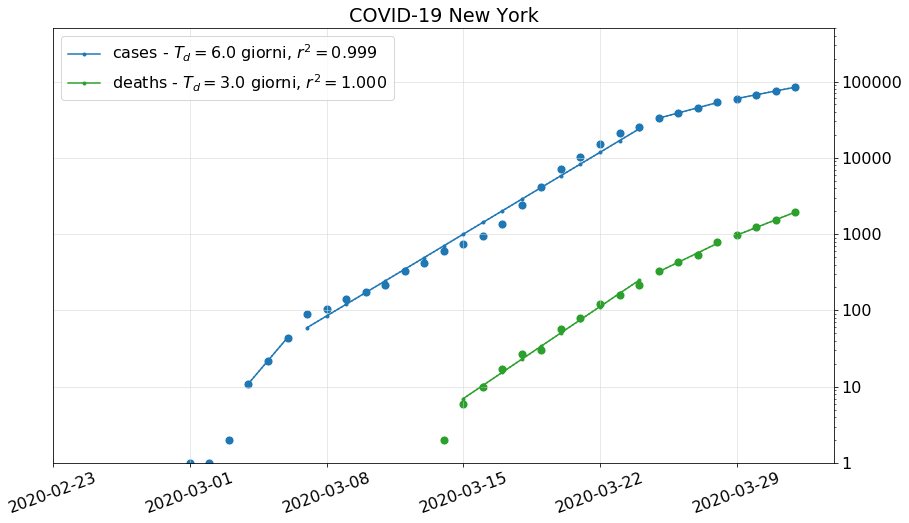

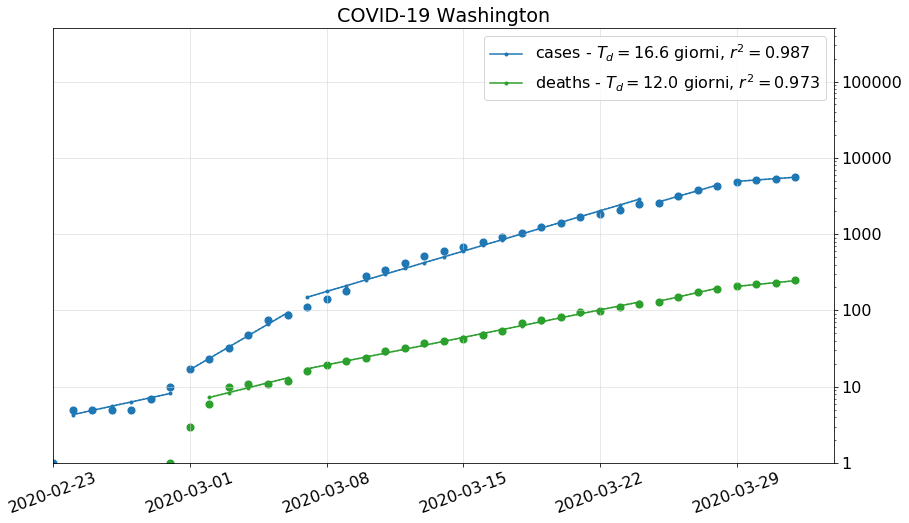

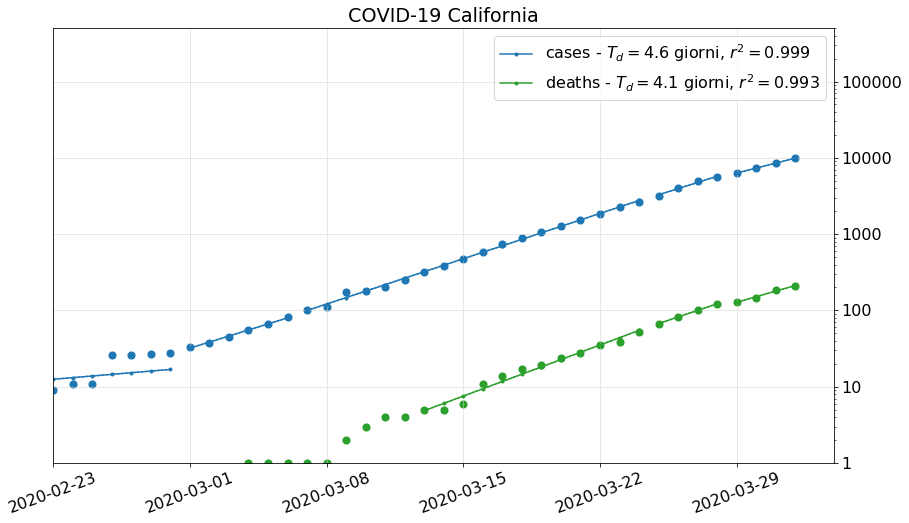

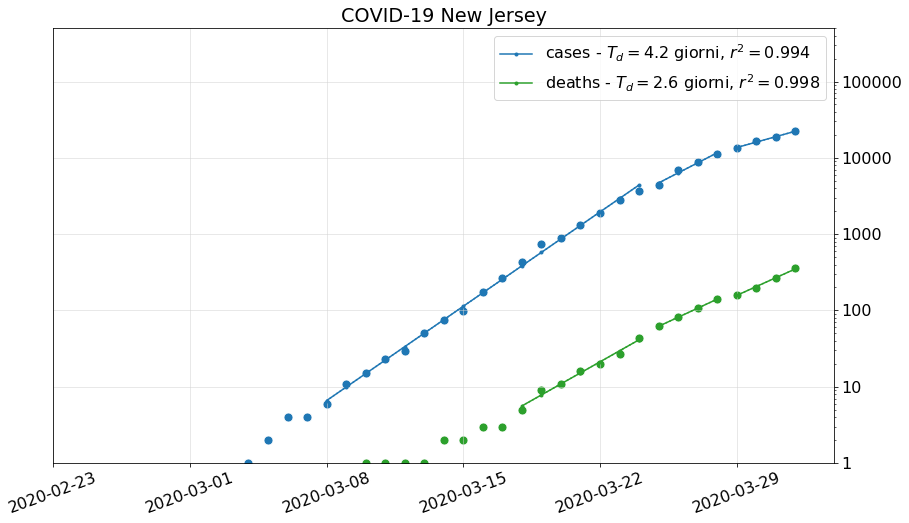

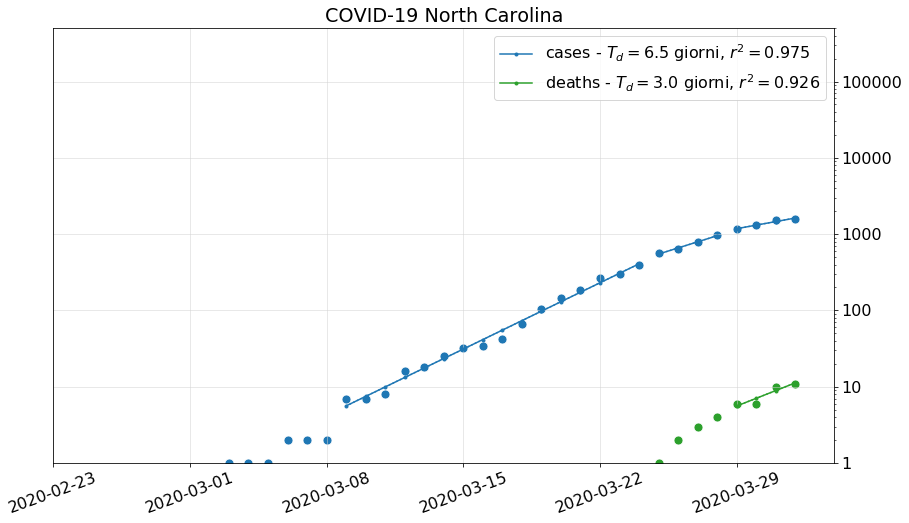

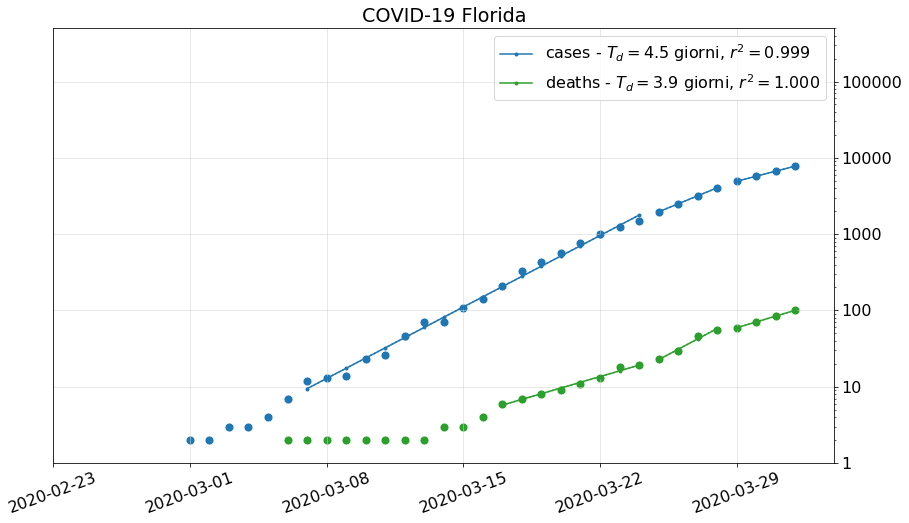

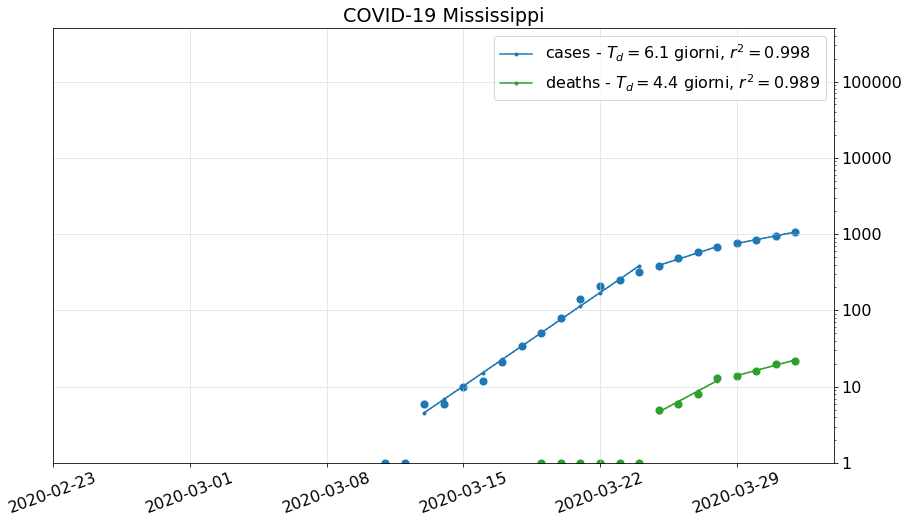

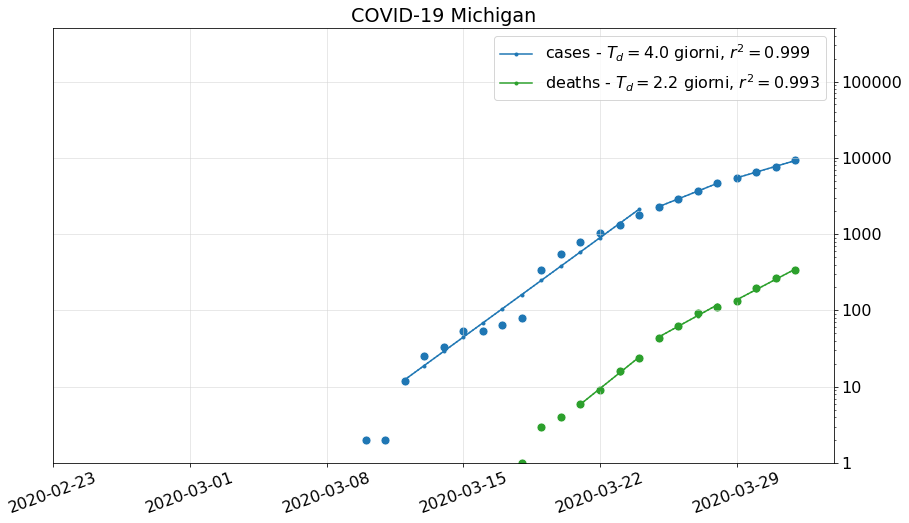

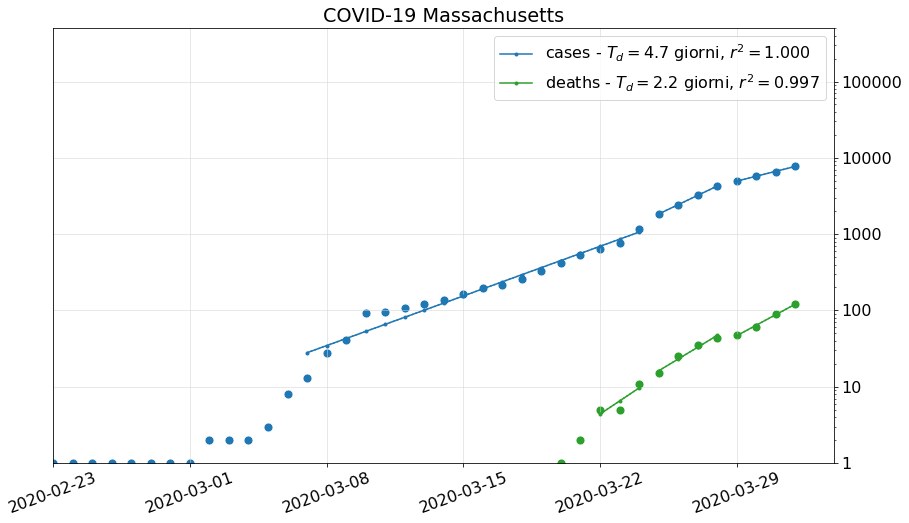

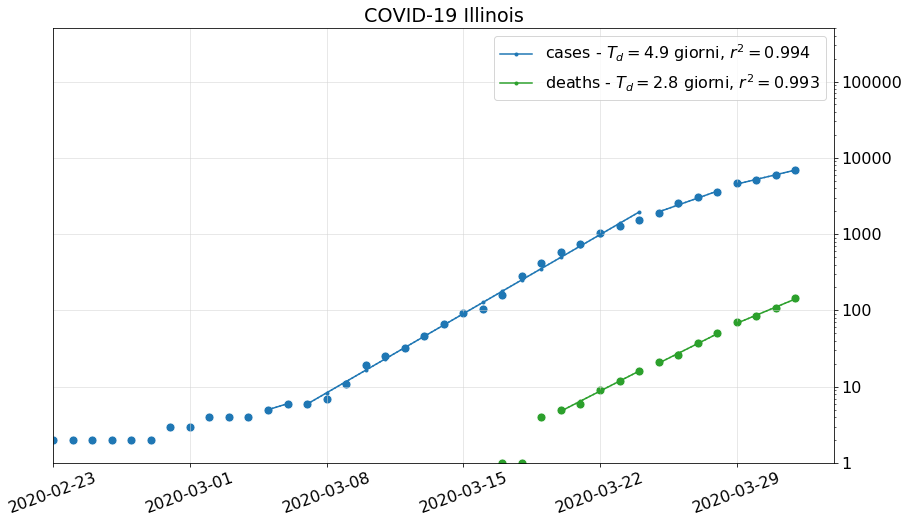

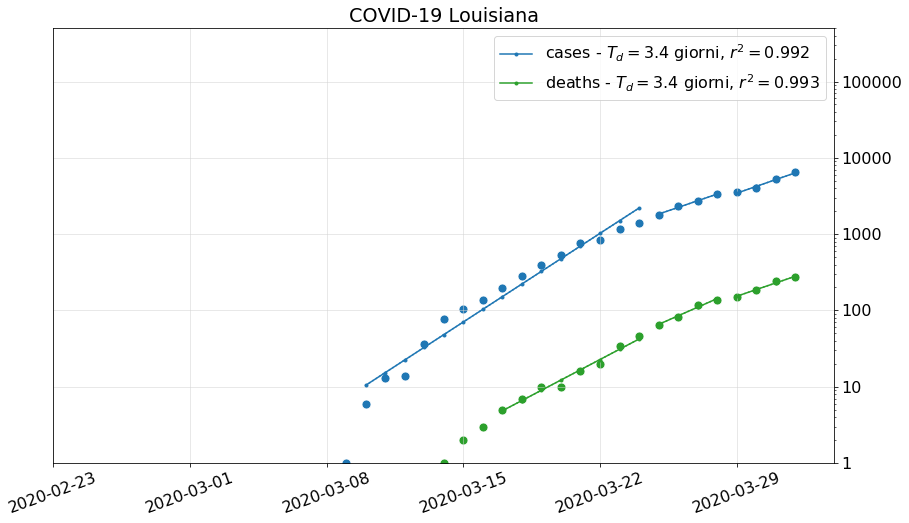

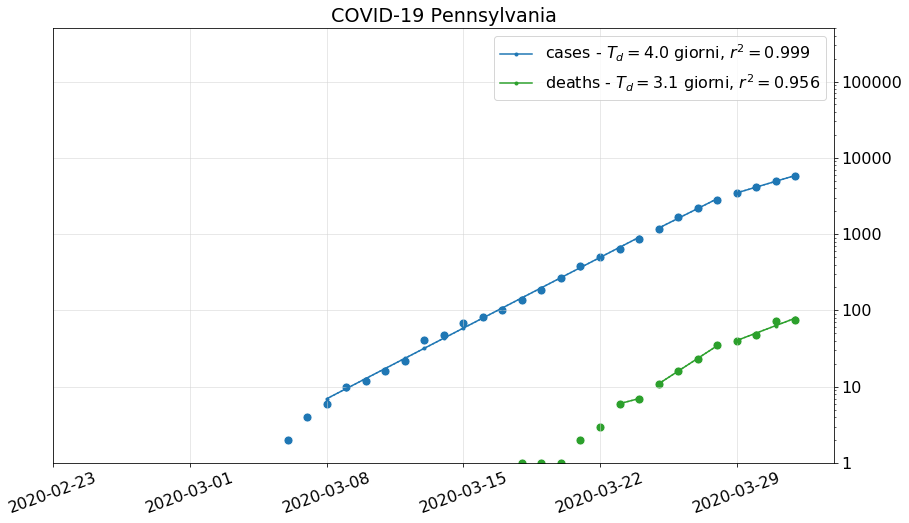

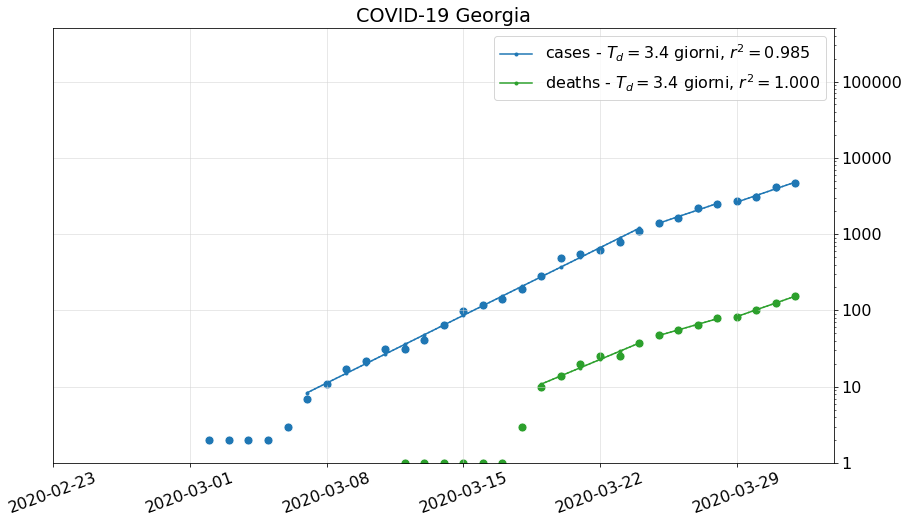

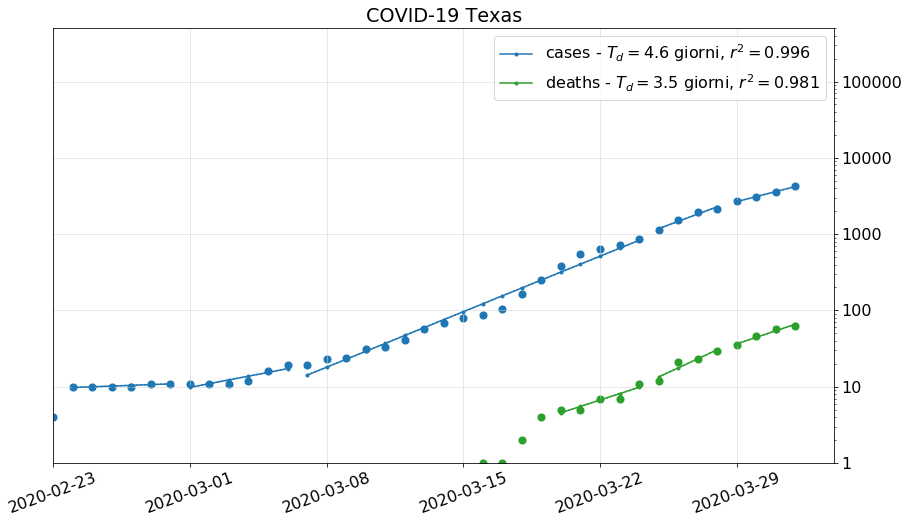

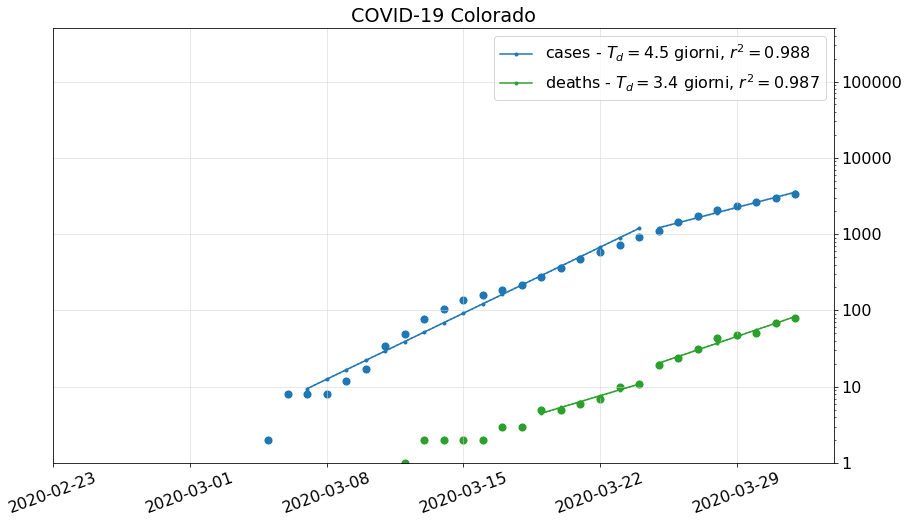

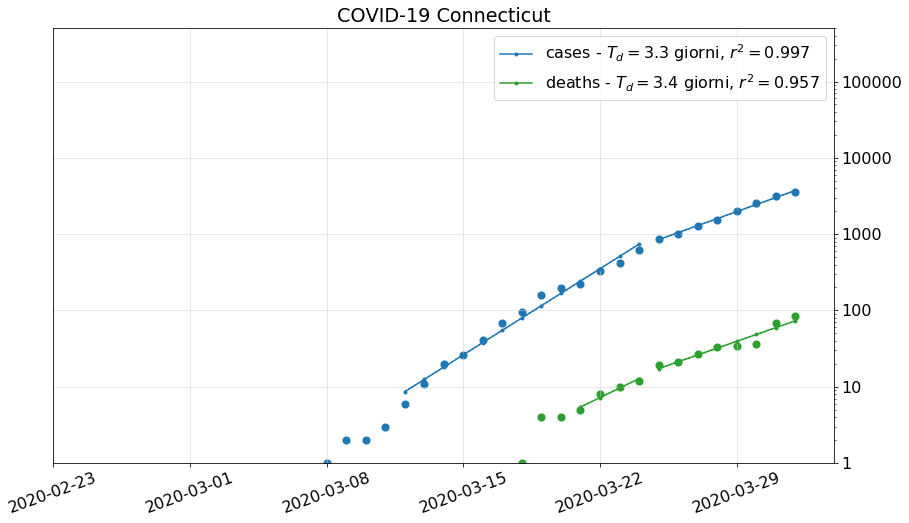

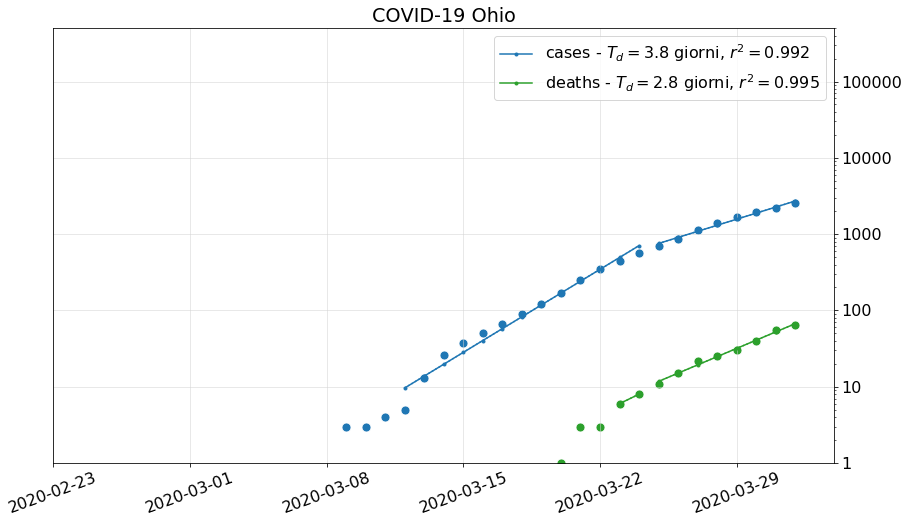

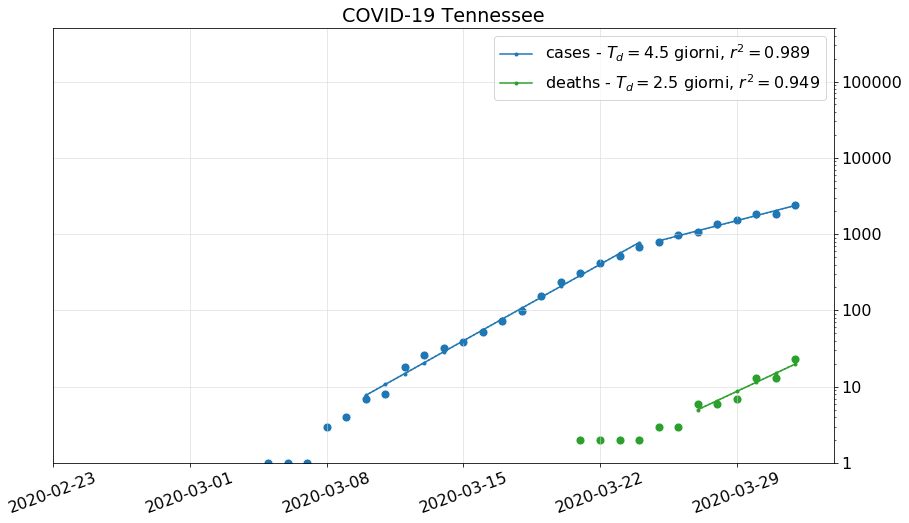

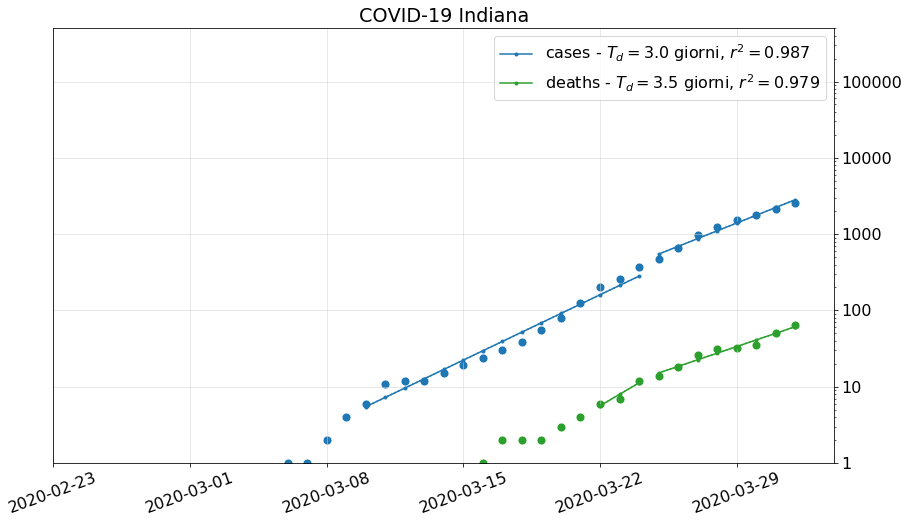

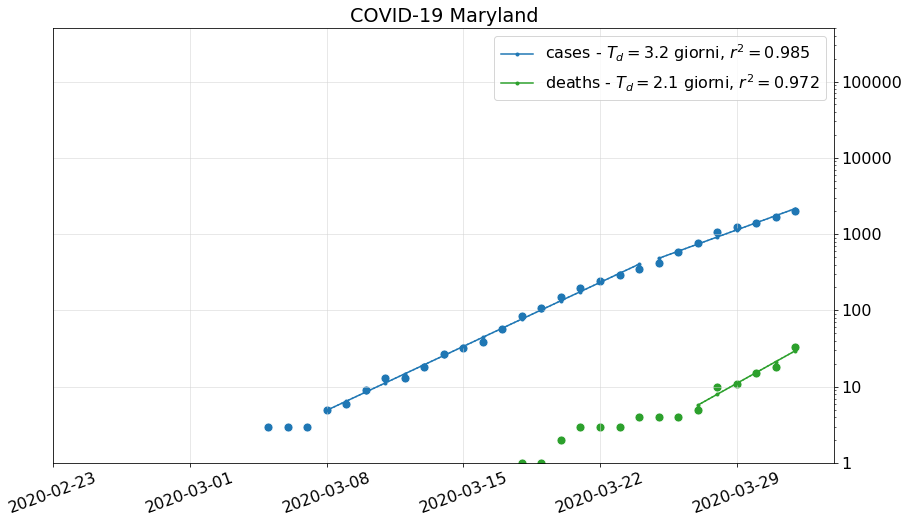

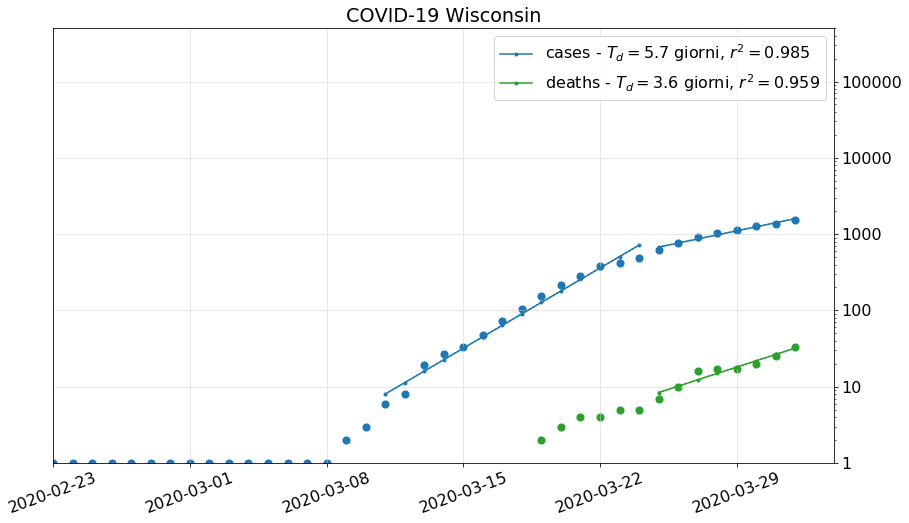

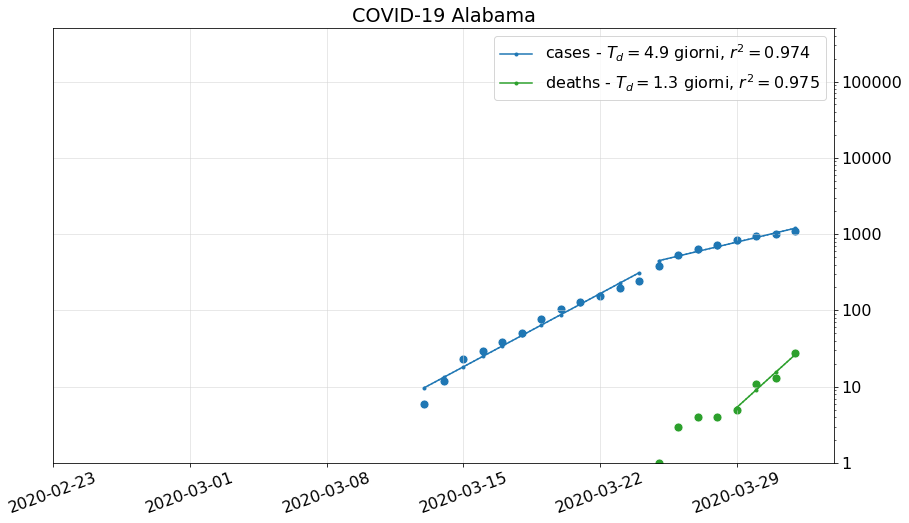

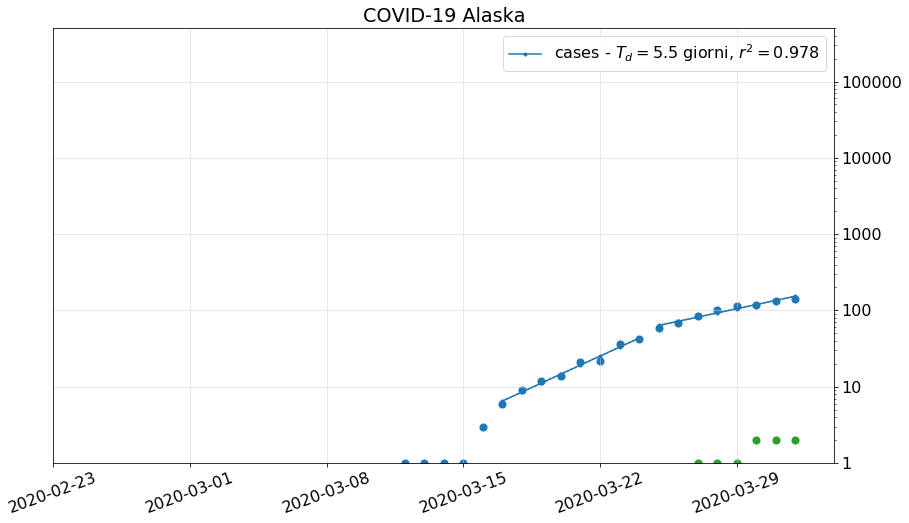

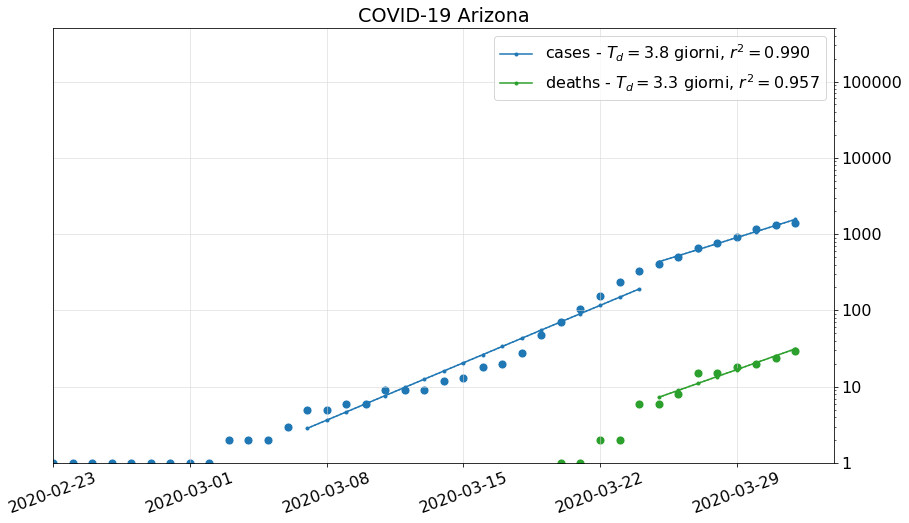

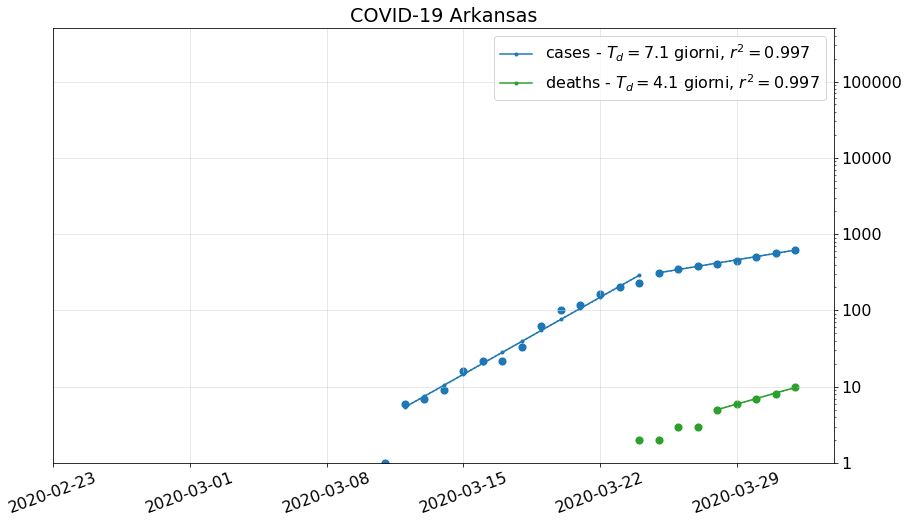

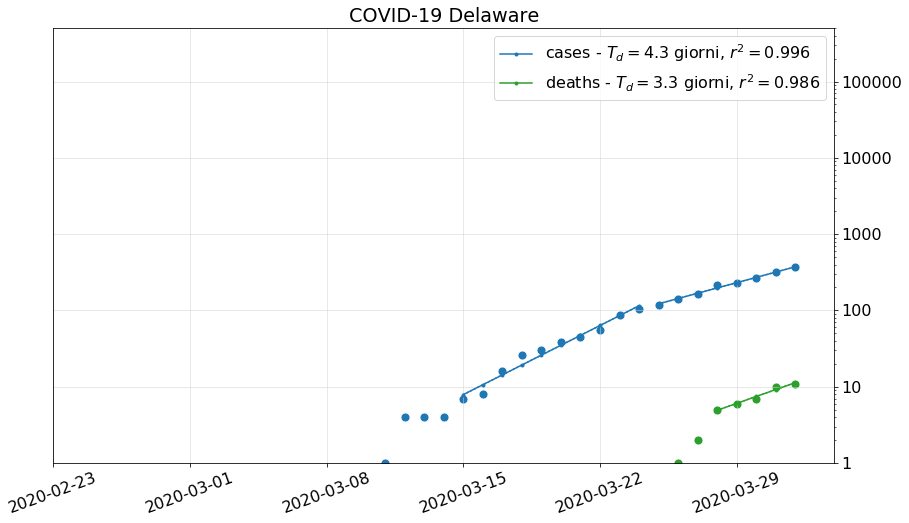

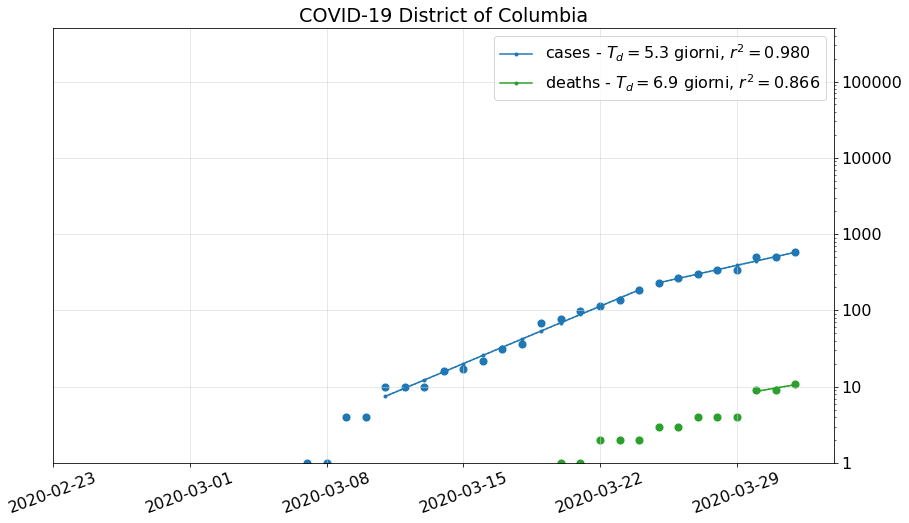

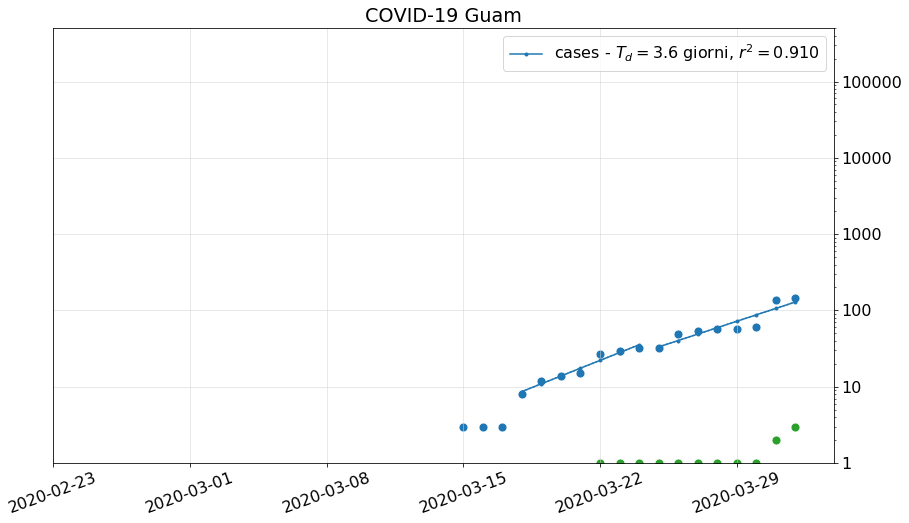

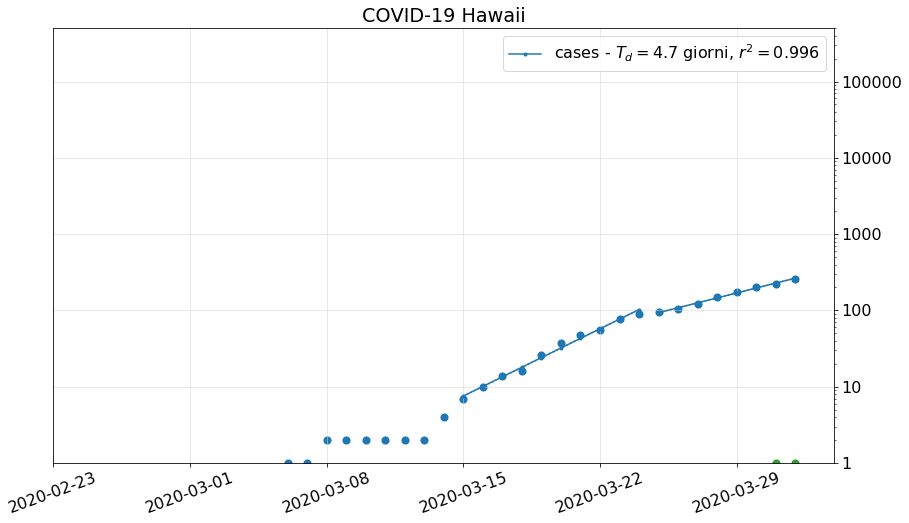

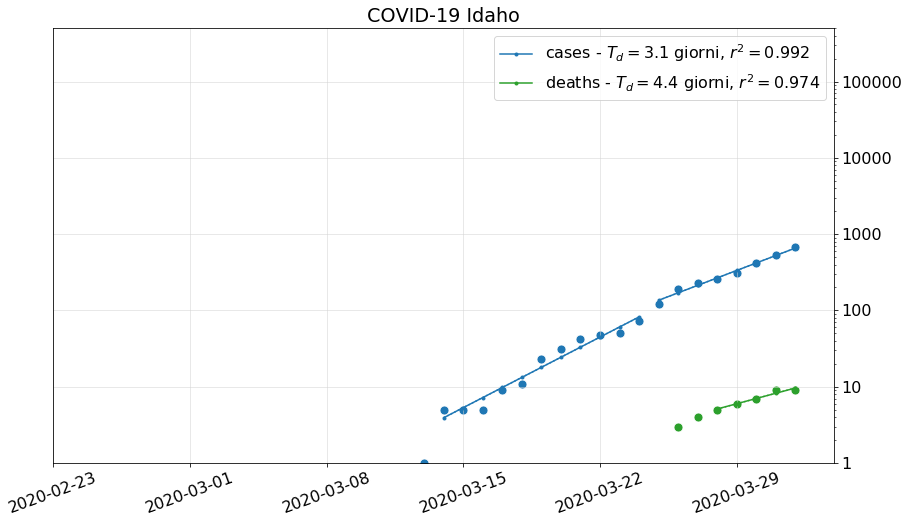

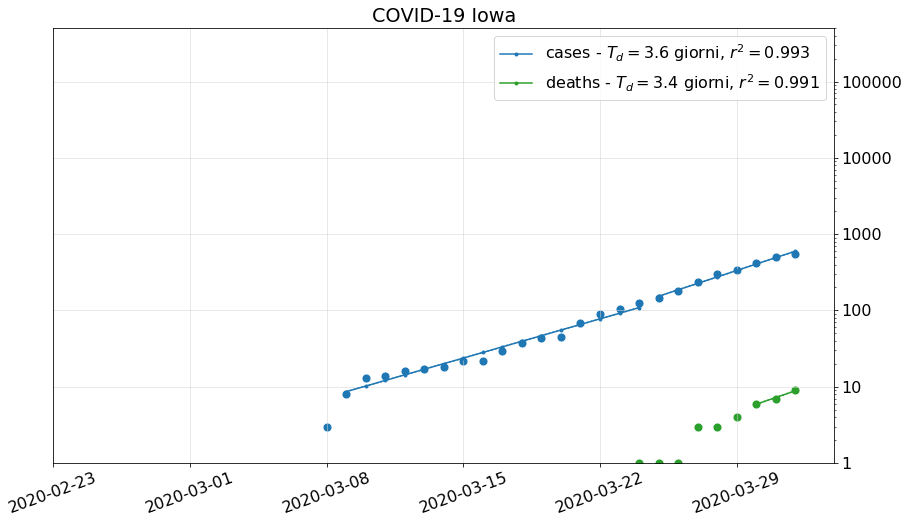

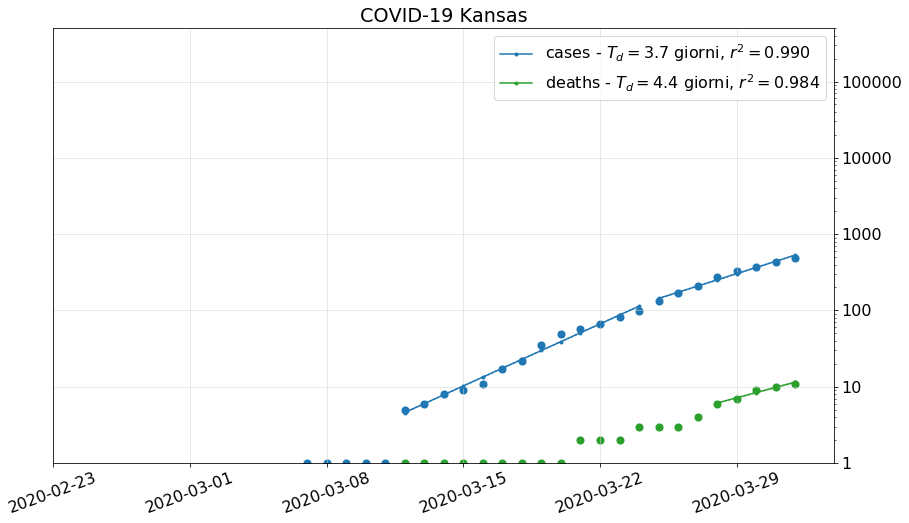

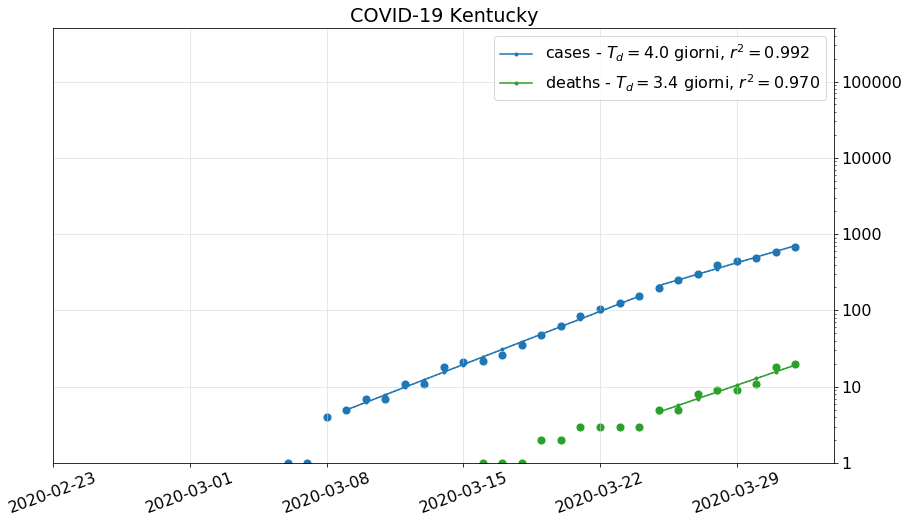

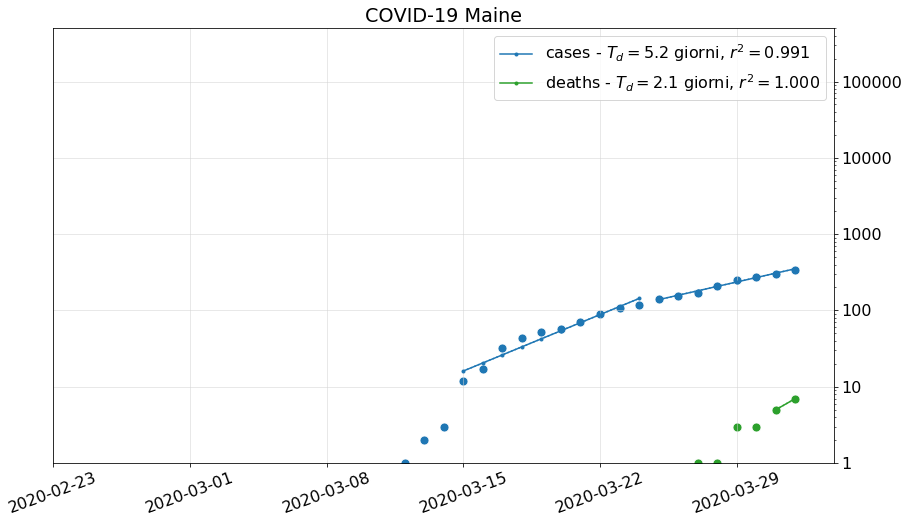

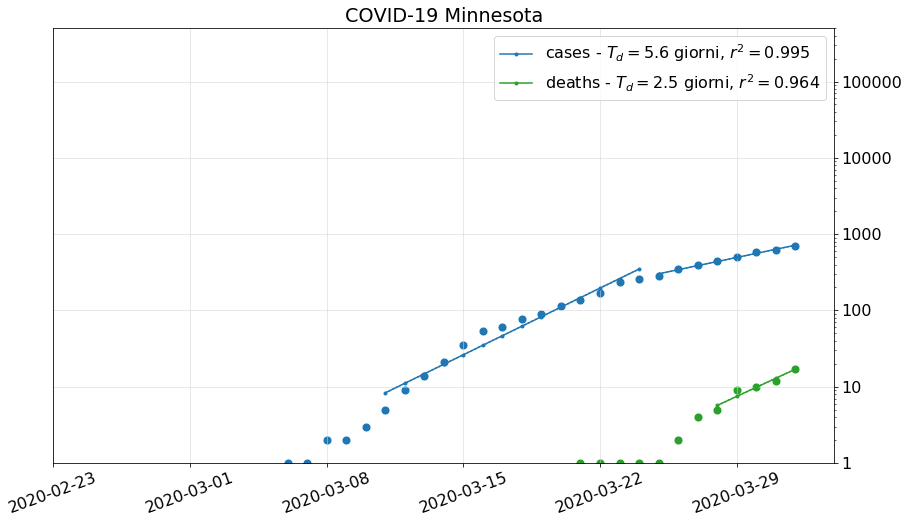

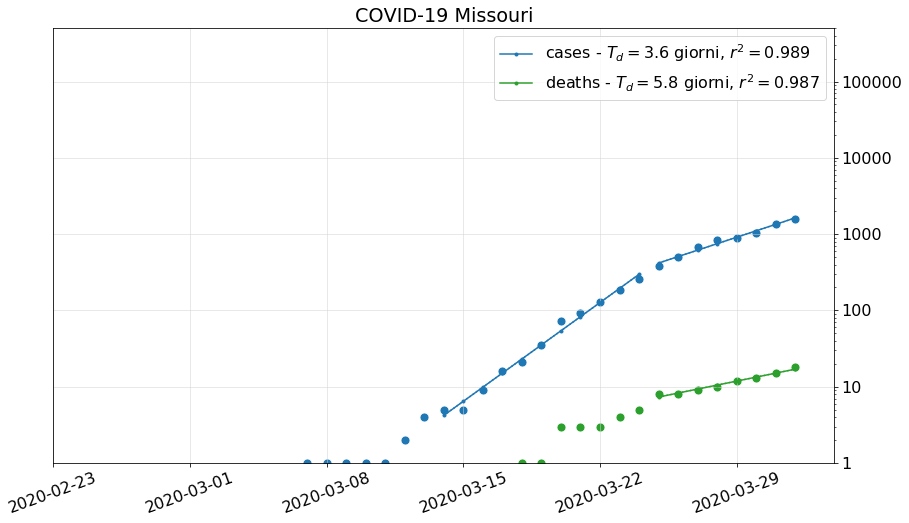

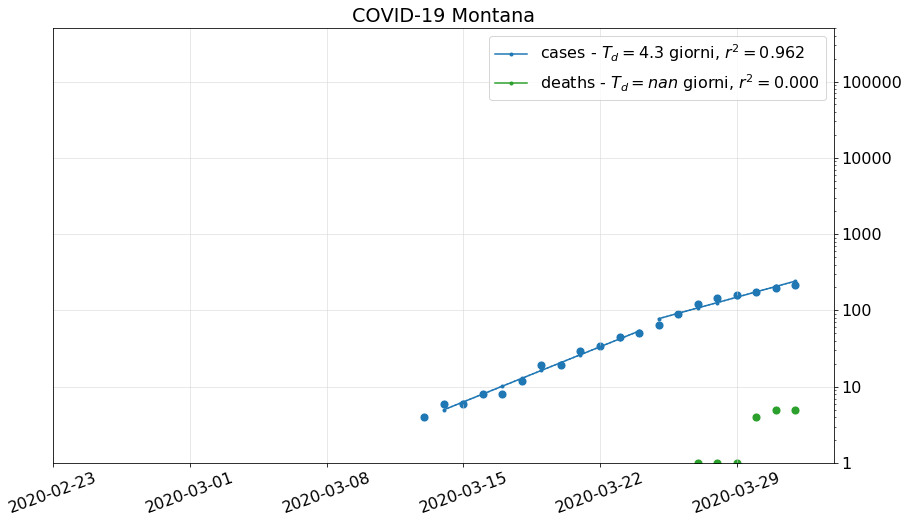

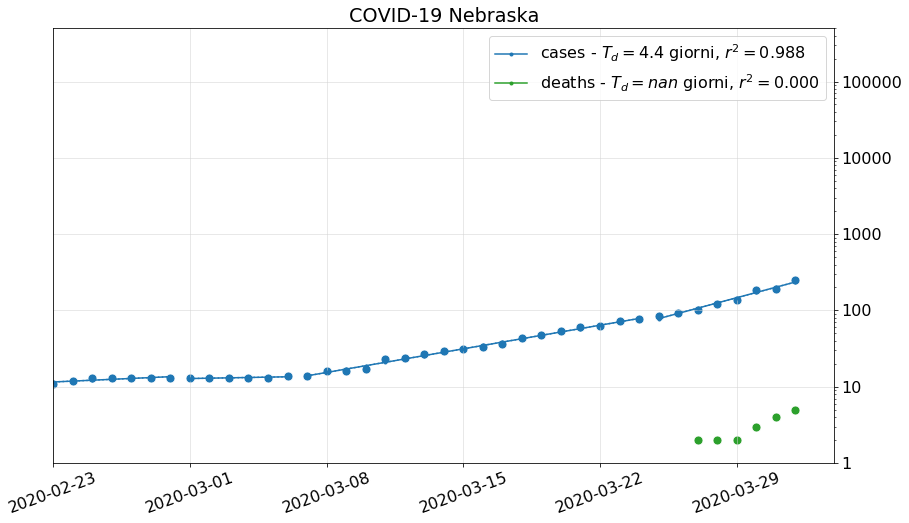

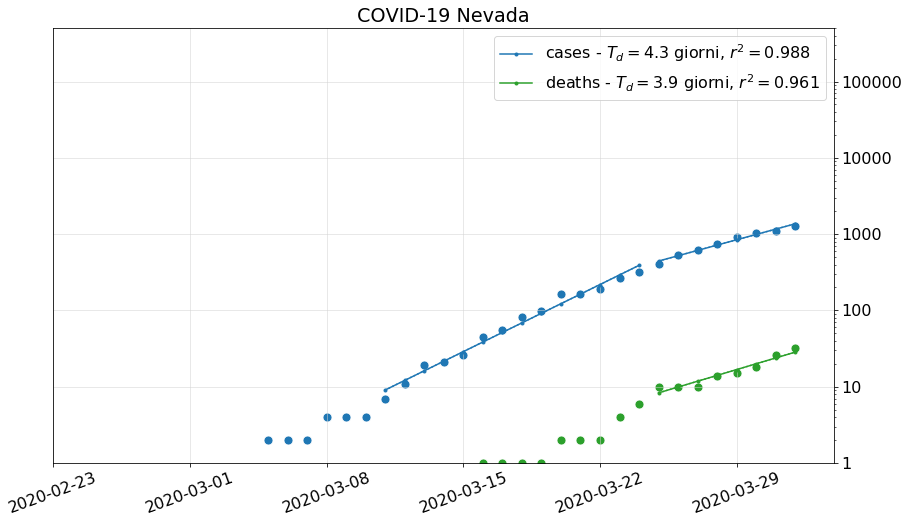

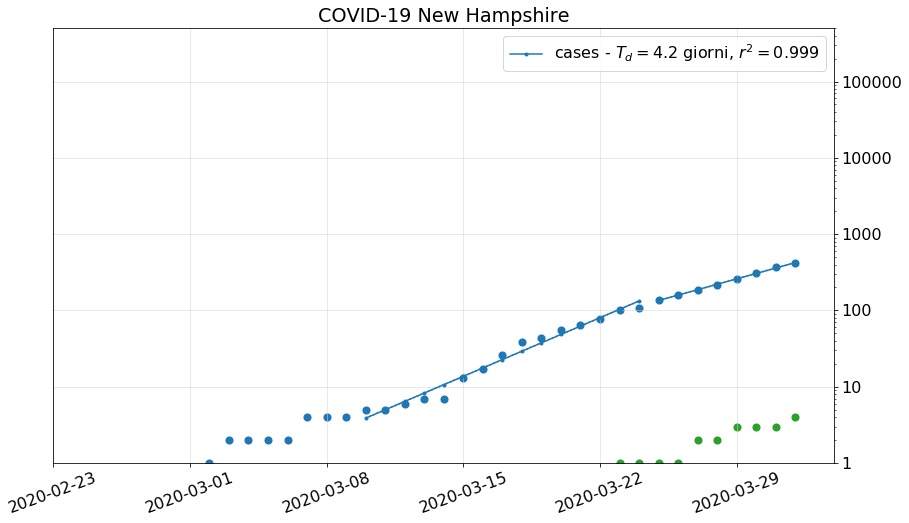

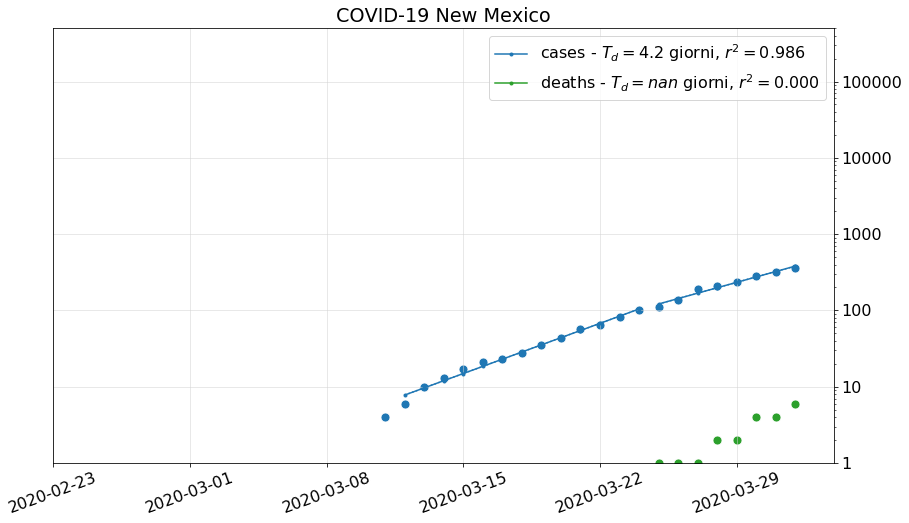

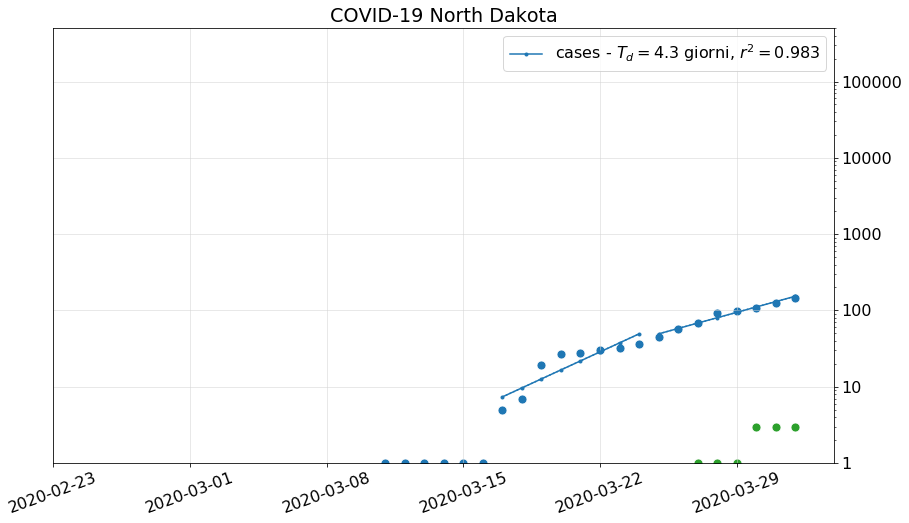

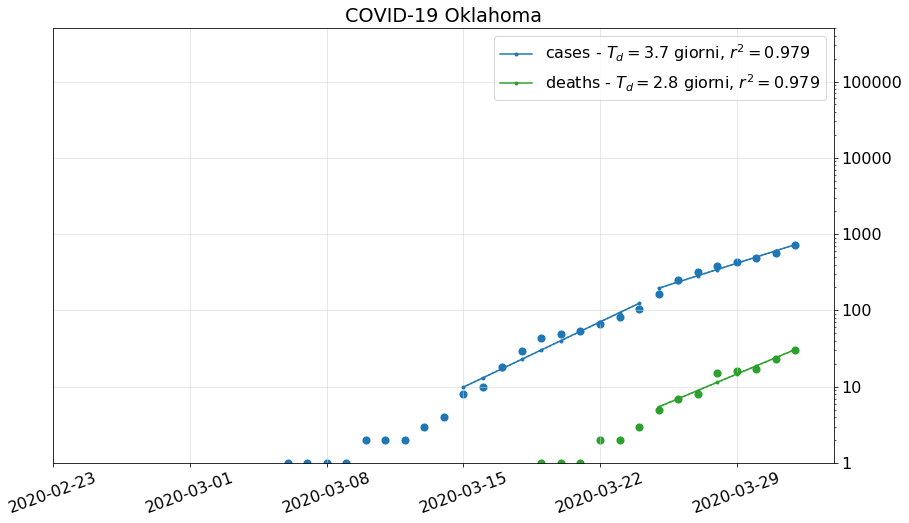

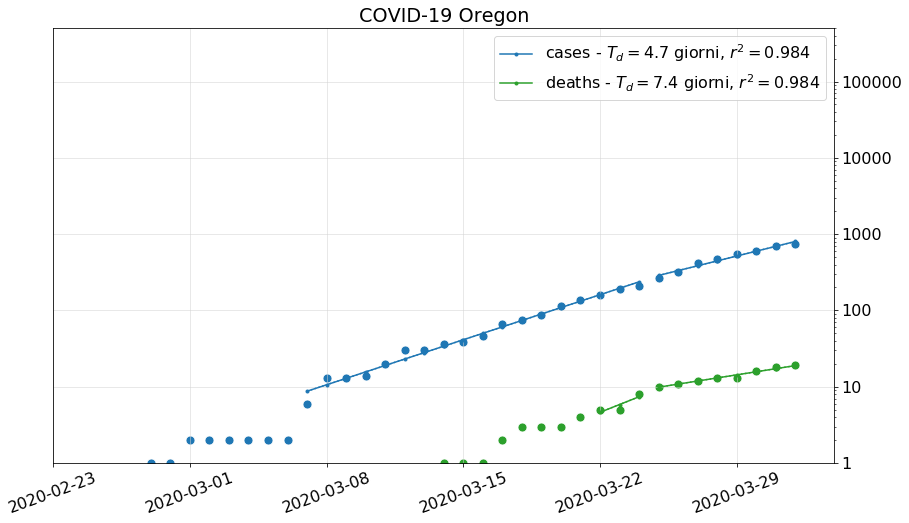

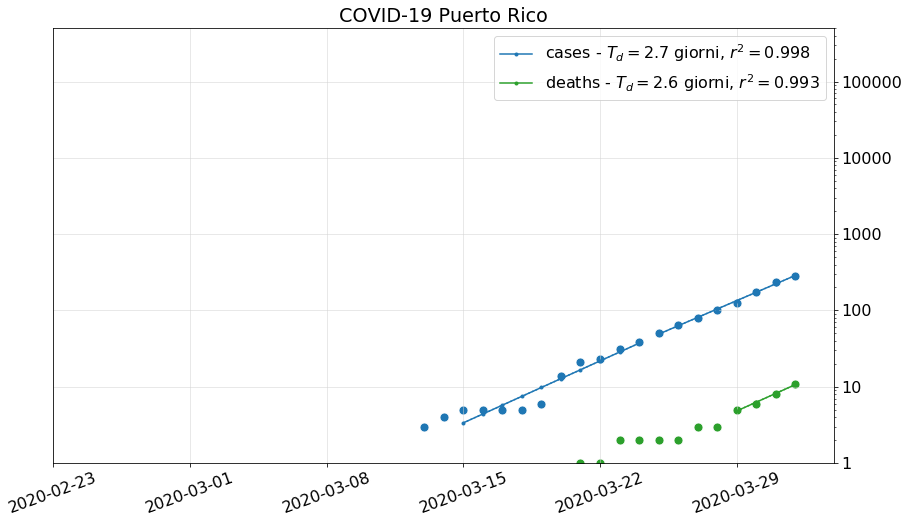

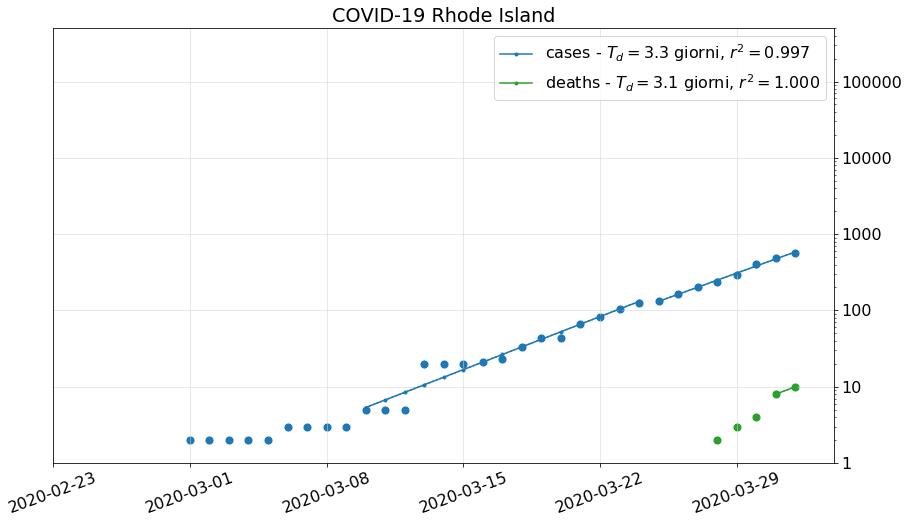

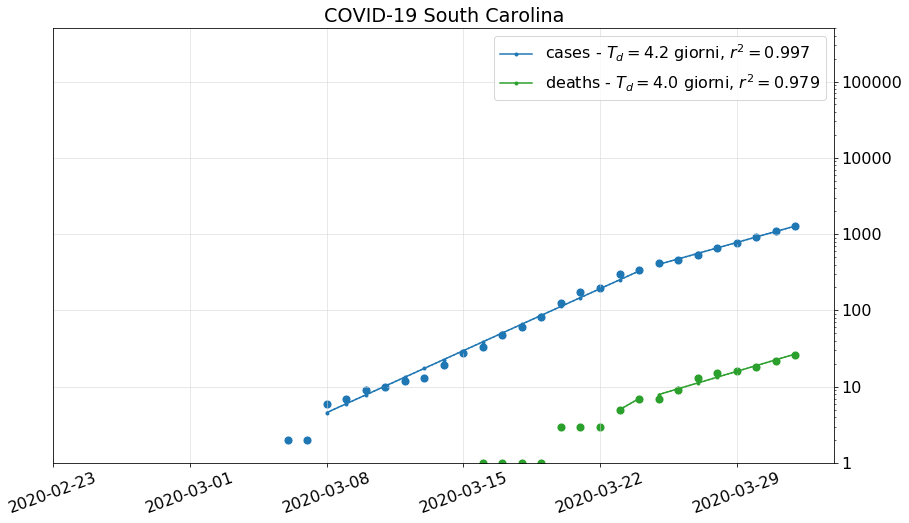

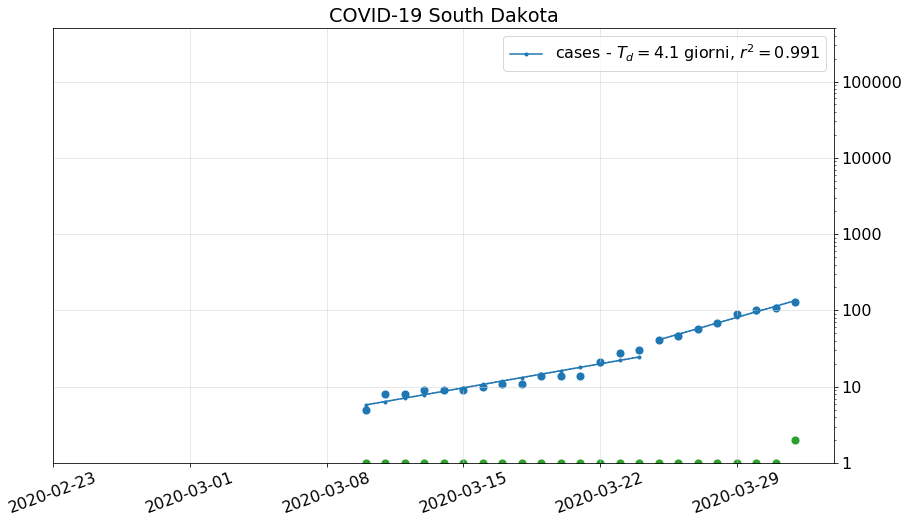

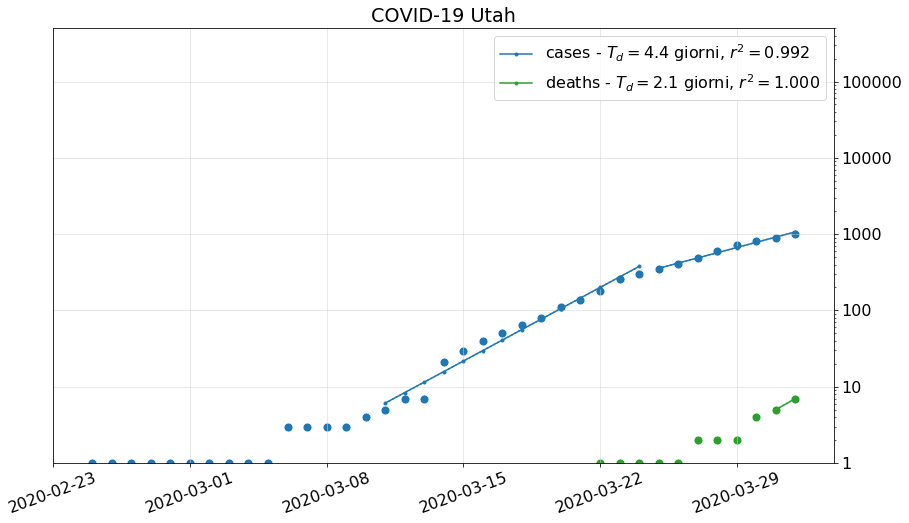

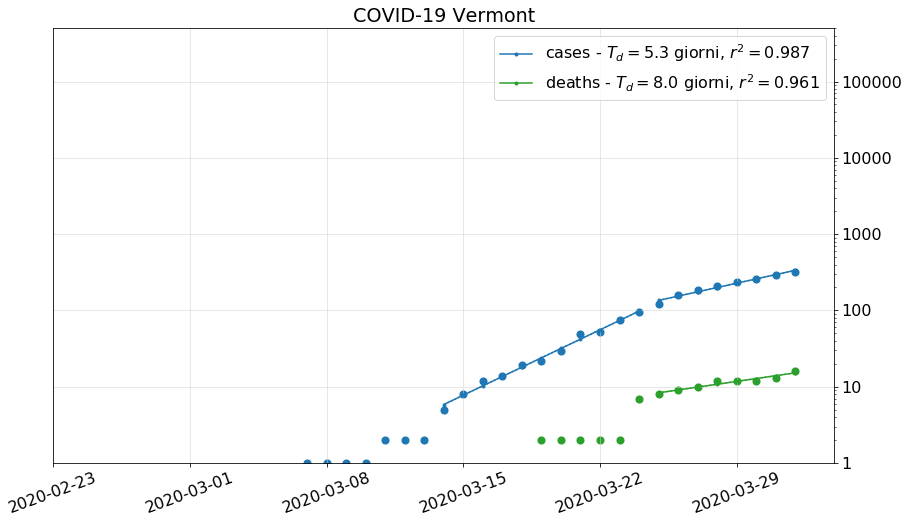

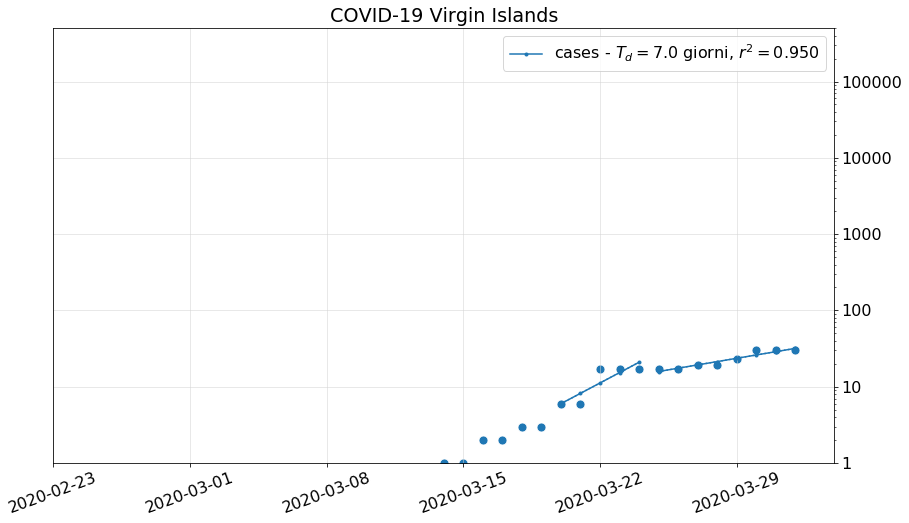

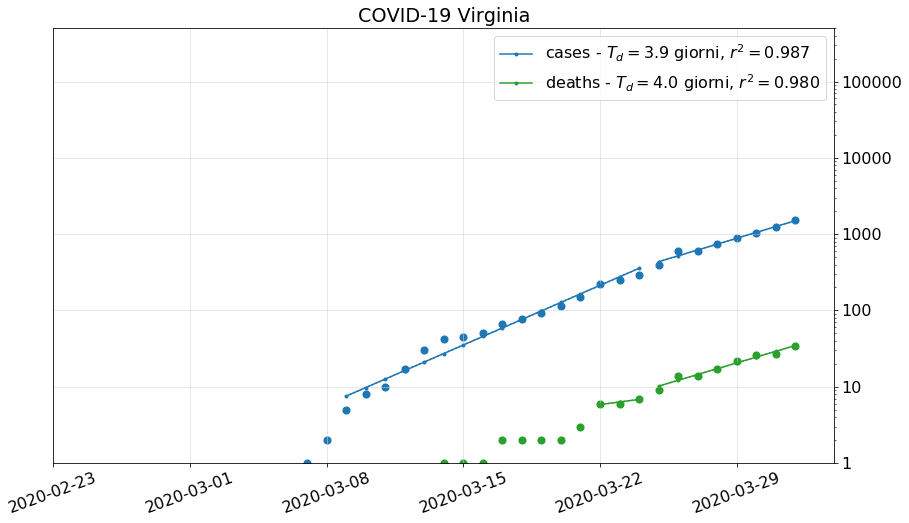

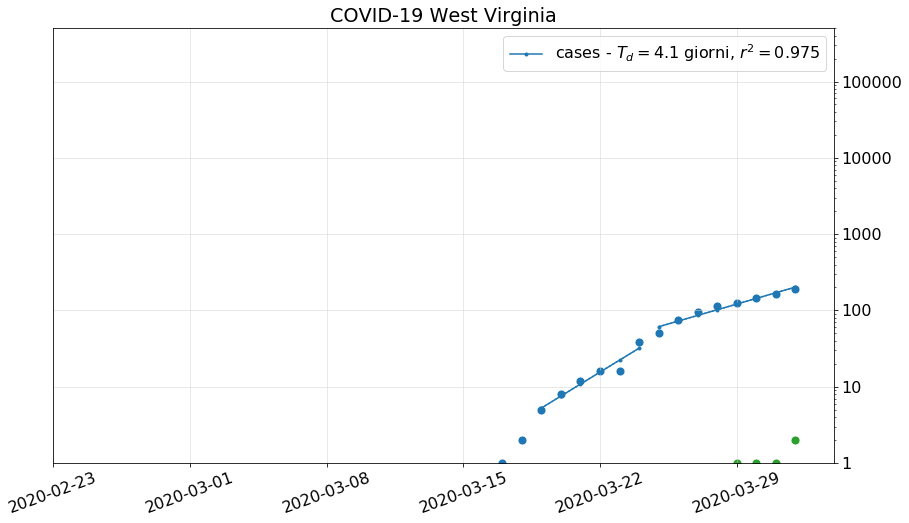

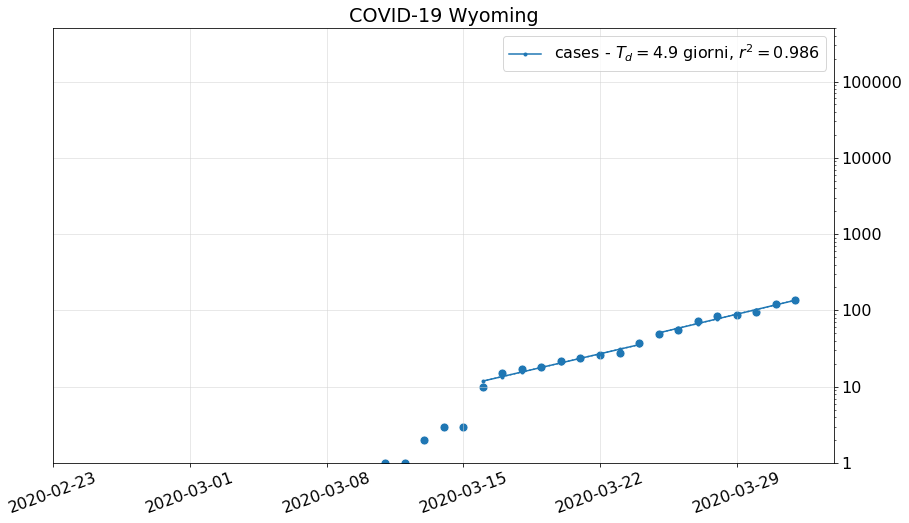

In [8]:
for region, fit_kinds in region_fits.items():
    _, ax = plt.subplots(subplot_kw={'yscale': 'log', 'ylim': (1, 500000), 'xlim': XLIM}, figsize=(14, 8))
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)
    ax.set_title(f'COVID-19 {region}')
    ax.yaxis.tick_right()
    ax.legend(loc='top left')

    for (kind, fits), color in zip(fit_kinds.items(), PALETTE_ONE):
        if kind == 'hospitalized':
            continue
        for fit in fits:
            # BGA to avoid all this stuff shown
            if fit == fits[-1]:
                covid19.plot.plot_fit(ax, fit, label=kind, color=color)
            else: 
                covid19.plot.plot_fit(ax, fit, color=color)
            #covid19.plot.plot_fit(ax, fit, label=kind, color=color)

        covid19.plot.plot_data(ax, data_regions[region][kind], color=color, date_interval=7)
    

In [9]:
print('## Initial exponential speed')
for region, fit_kinds in region_fits.items():
    if len(fit_kinds['deceduti']):
        print(f'{region}:{" " * (14 - len(region))} {str(fit_kinds["deceduti"][0])}')

## Initial exponential speed


KeyError: 'deceduti'

In [ ]:
print('## Current exponential speed')
for region, fit_kinds in region_fits.items():
    if len(fit_kinds['deceduti']):
        print(f'{region}:{" " * (14 - len(region))} {str(fit_kinds["deceduti"][-1])}')